# SPAM SMS DETECTION

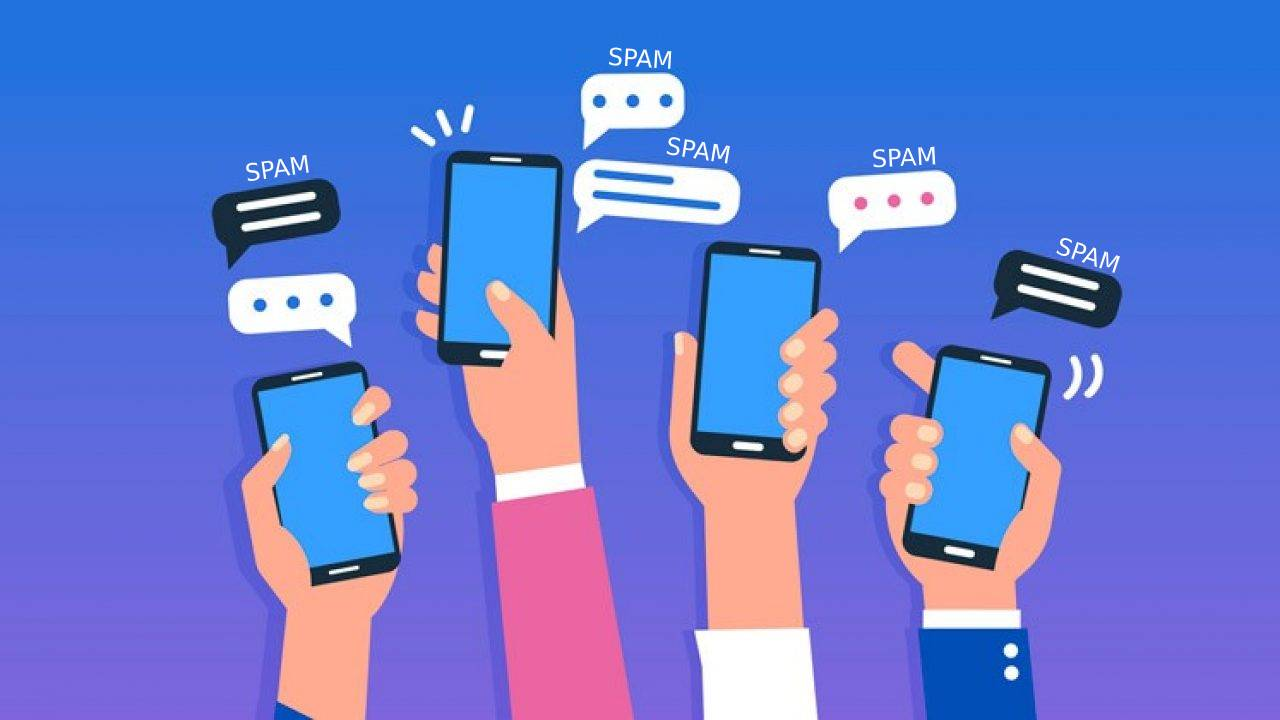

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
sp=pd.read_csv("C:/Users/admin/git/spam.csv",encoding='Unicode_escape')

### Dataset Details

In [3]:
sp

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5565,spam,This is the 2nd time we have tried 2 contact u...
5566,ham,Will ü b going to esplanade fr home?
5567,ham,"Pity, * was in mood for that. So...any other s..."
5568,ham,The guy did some bitching but I acted like i'd...


In [4]:
sp.head

<bound method NDFrame.head of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5565     spam  This is the 2nd time we have tried 2 contact u...
5566      ham               Will ü b going to esplanade fr home?
5567      ham  Pity, * was in mood for that. So...any other s...
5568      ham  The guy did some bitching but I acted like i'd...
5569      ham                         Rofl. Its true to its name

[5570 rows x 2 columns]>

In [5]:
sp.tail

<bound method NDFrame.tail of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5565     spam  This is the 2nd time we have tried 2 contact u...
5566      ham               Will ü b going to esplanade fr home?
5567      ham  Pity, * was in mood for that. So...any other s...
5568      ham  The guy did some bitching but I acted like i'd...
5569      ham                         Rofl. Its true to its name

[5570 rows x 2 columns]>

In [6]:
sp.sample

<bound method NDFrame.sample of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5565     spam  This is the 2nd time we have tried 2 contact u...
5566      ham               Will ü b going to esplanade fr home?
5567      ham  Pity, * was in mood for that. So...any other s...
5568      ham  The guy did some bitching but I acted like i'd...
5569      ham                         Rofl. Its true to its name

[5570 rows x 2 columns]>

In [7]:
sp.columns

Index(['Category', 'Message'], dtype='object')

In [8]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5570 non-null   object
 1   Message   5570 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
sp.describe()

,Category,Message
count,5570,5570
unique,2,5155
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
type(sp)

pandas.core.frame.DataFrame

In [11]:
sp.shape

(5570, 2)

In [12]:
sp.size

11140

In [13]:
sp.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5565,False,False
5566,False,False
5567,False,False
5568,False,False


In [14]:
sp.isnull().sum()

Category    0
Message     0
dtype: int64

#### Converting Categorical values to Category data

In [15]:
sp['Category']=sp['Category'].astype('category')
sp['Category']=sp['Category'].cat.codes

In [16]:
sp.dtypes

Category      int8
Message     object
dtype: object

In [17]:
sp['Category'].unique()

array([0, 1], dtype=int8)

In [18]:
sp['Category'].nunique()

2

In [19]:
sp['Category'].values

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [20]:
sp['Category'].value_counts()

Category
0    4825
1     745
Name: count, dtype: int64

In [21]:
sp.columns

Index(['Category', 'Message'], dtype='object')

In [22]:
sp['Message'].unique()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [23]:
sp['Message'].nunique()

5155

In [24]:
sp['Message'].values

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [25]:
sp['Message'].value_counts()

Message
Sorry, I'll call later                                                                                                                                      30
I cant pick the phone right now. Pls send a message                                                                                                         12
Ok...                                                                                                                                                       10
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                     4
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!          4
                                                                                                                                                            ..
Ok but knackered. Just came home and w

### Importing Models

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [27]:
x_train,x_test,y_train,y_test=train_test_split(sp.Message,sp.Category,test_size=0.2)

In [28]:
x_train

198     Hi its Kate how is your evening? I hope i can ...
5365    Just trying to figure out when I'm suppose to ...
2873    Crucify is c not s. You should have told me ea...
304     SMS. ac Blind Date 4U!: Rodds1 is 21/m from Ab...
5314                         Jus finish watching tv... U?
                              ...                        
3138                                  Is ur lecture over?
3131    I've been barred from all B and Q stores for l...
5308                     yeah, that's what I was thinking
798                 Gimme a few was &lt;#&gt; minutes ago
3273                                       Thanx a lot...
Name: Message, Length: 4456, dtype: object

In [29]:
x_train.shape

(4456,)

In [30]:
y_train

198     0
5365    0
2873    0
304     1
5314    0
       ..
3138    0
3131    0
5308    0
798     0
3273    0
Name: Category, Length: 4456, dtype: int8

In [31]:
y_train.shape

(4456,)

In [32]:
x_test

1295    Sure! I am driving but will reach my destinati...
932     What time you think you'll have it? Need to kn...
2003    Goodmorning, today i am late for &lt;DECIMAL&g...
707     To review and KEEP the fantastic Nokia N-Gage ...
4069    Ok i wont call or disturb any one. I know all ...
                              ...                        
1649    I dont have any of your file in my bag..i was ...
2401    Oh oh... Wasted... Den muz chiong on sat n sun...
5199    YOU VE WON! Your 4* Costa Del Sol Holiday or £...
3526                    Should i send you naughty pix? :)
2947    Nope but i'll b going 2 sch on fri quite early...
Name: Message, Length: 1114, dtype: object

In [33]:
x_test.shape

(1114,)

In [34]:
y_test

1295    0
932     0
2003    0
707     1
4069    0
       ..
1649    0
2401    0
5199    1
3526    0
2947    0
Name: Category, Length: 1114, dtype: int8

In [35]:
y_test.shape

(1114,)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x_train_count=vectorizer.fit_transform(x_train.values)


In [37]:
x_train_count.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
x_train_count.shape

(4456, 7738)

In [39]:
y_train[:5]

198     0
5365    0
2873    0
304     1
5314    0
Name: Category, dtype: int8

In [40]:
y_train.shape

(4456,)

### MultinomialNB

In [41]:
model=MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [42]:
emails=['Hi Pushpa lets get together and watch a movie',
       'Exclusive offer 50% on parking just for you.',
       'Hi Neethu lets get together and watch a movie',
       'Exclusive offer 50% on parking just for you.',
       'Oh k...im watching here:',
        'urgent opening for Data analyst and data scientist!'
        'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'
]

In [43]:
emails_count=vectorizer.transform(emails)
model.predict(emails_count)

array([0, 1, 0, 1, 0, 1], dtype=int8)

In [44]:
model.predict(emails_count)

array([0, 1, 0, 1, 0, 1], dtype=int8)

In [45]:
x_test_count=vectorizer.transform(x_test)
model.predict(x_test_count)

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [46]:
model.score(x_test_count,y_test)

0.9865350089766607

In [47]:
predictions=model.predict(x_test_count)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9865350089766607


In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      0.90      0.94       134

    accuracy                           0.99      1114
   macro avg       0.99      0.95      0.97      1114
weighted avg       0.99      0.99      0.99      1114



### Logistic Regression

In [49]:
LRmodel=LogisticRegression()
LRmodel.fit(x_train_count,y_train)

LogisticRegression()

In [50]:
emails=['Hi Pushpa lets get together and watch a movie',
       'Exclusive offer 50% on parking just for you.',
       'Hi Neethu lets get together and watch a movie',
       'Exclusive offer 50% on parking just for you.',
       'Oh k...im watching here:',
        'urgent opening for Data analyst and data scientist!'
        'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'
]

In [51]:
emails_count=vectorizer.transform(emails)
LRmodel.predict(emails_count)

array([0, 0, 0, 0, 0, 1], dtype=int8)

In [52]:
LRmodel.predict(emails_count)

array([0, 0, 0, 0, 0, 1], dtype=int8)

In [53]:
LRmodel.score(x_test_count,y_test)

0.9838420107719928

In [54]:
predictions=LRmodel.predict(x_test_count)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9838420107719928


In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.87      0.93       134

    accuracy                           0.98      1114
   macro avg       0.99      0.94      0.96      1114
weighted avg       0.98      0.98      0.98      1114



### Support Vector Machines

In [56]:
svmodel=SVC()
svmodel.fit(x_train_count,y_train)

SVC()

In [57]:
emails=['Hi Pushpa lets get together and watch a movie',
       'Exclusive offer 50% on parking just for you.',
       'Hi Neethu lets get together and watch a movie',
       'Exclusive offer 50% on parking just for you.',
       'Oh k...im watching here:',
        'urgent opening for Data analyst and data scientist!'
        'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'
]

In [58]:
emails_count=vectorizer.transform(emails)
svmodel.predict(emails_count)

array([0, 0, 0, 0, 0, 1], dtype=int8)

In [59]:
svmodel.predict(emails_count)

array([0, 0, 0, 0, 0, 1], dtype=int8)

In [60]:
svmodel.score(x_test_count,y_test)

0.9838420107719928

In [61]:
predictions=svmodel.predict(x_test_count)
accuracy=accuracy_score(y_test,predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9838420107719928


In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.87      0.93       134

    accuracy                           0.98      1114
   macro avg       0.99      0.93      0.96      1114
weighted avg       0.98      0.98      0.98      1114

